In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from glob import glob

In [31]:

def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance


In [32]:

def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    
    print("Covariance Matrix:")
    print(cov)
    print("\nMean of the data:")
    print(np.mean(X, axis=0))
    
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov)
        else:
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    # Plotting the centroid movement
    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()
        
    return centroids, idx

In [33]:

def visualize_centroid_images_smooth(centroids, pca, title_prefix):
    for i, p in enumerate(centroids):
        
        tp = pca.inverse_transform(p)
        restored_image = tp.reshape(512, 512)  
       
        normalized_image = (restored_image - restored_image.min()) / (restored_image.max() - restored_image.min())

        plt.imshow(normalized_image, cmap='viridis')
        plt.colorbar()  
        plt.title(f"{title_prefix} Centroid {i + 1}")
        plt.axis("off")
        plt.show()

Covariance Matrix:
[[1.11351028e+07 1.63289956e-09]
 [1.63289956e-09 9.13266411e+06]]

Mean of the data:
[9.38367549e-14 7.94003311e-14]
Converged in 4 iterations!


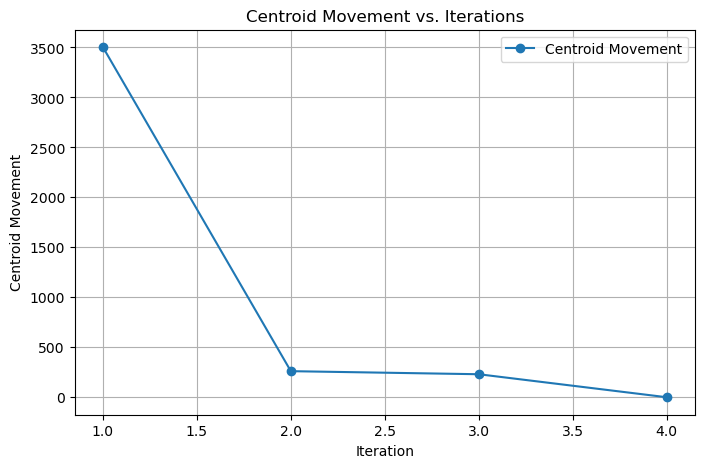

Covariance Matrix:
[[1.11351028e+07 1.63289956e-09]
 [1.63289956e-09 9.13266411e+06]]

Mean of the data:
[9.38367549e-14 7.94003311e-14]
Converged in 5 iterations!


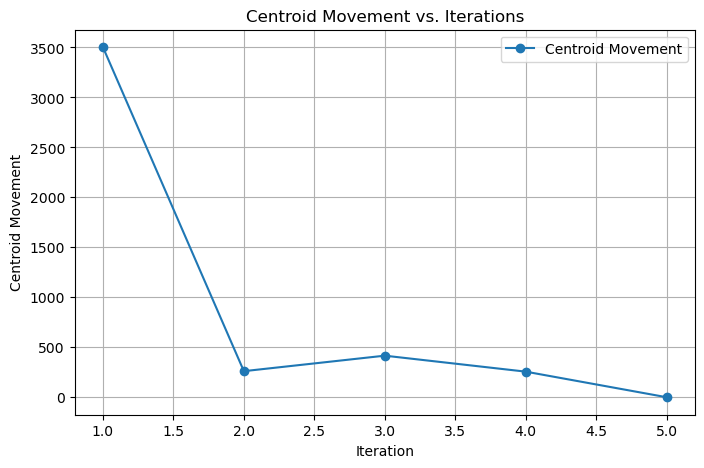

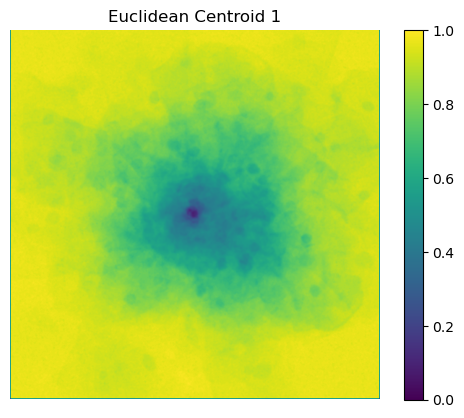

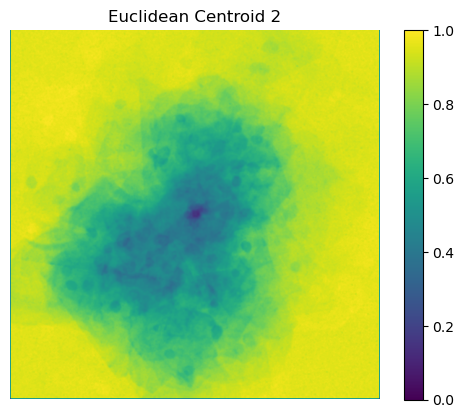

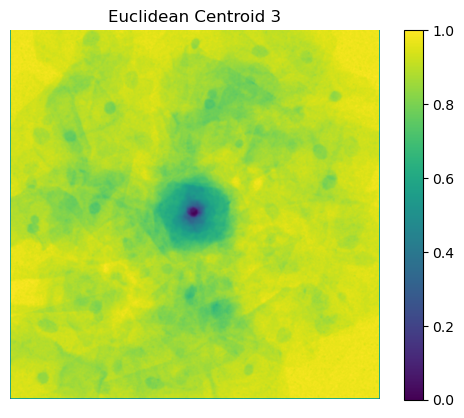

In [36]:


train_folder = r"group01_1/group01/Train"
test_folder = r"group01_1/group01/Test"
train_images = glob(f"{train_folder}/*.png")
test_images = glob(f"{test_folder}/*.png")
all_images = train_images + test_images

X = [cv2.imread(file, cv2.IMREAD_GRAYSCALE).flatten() for file in all_images]
X = np.array(X)   
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

    # Applying KMeans clustering (Euclidean)
centroidEuclid, idxEuclid = KMeansClustering(X_pca, K=3, maxIteration=100, mod=False)

    # Applying KMeans clustering (Mahalanobis)
centroidma, idxma = KMeansClustering(X_pca, K=3, maxIteration=100, mod=True)

    # Visualizing centroid images (Euclidean)
visualize_centroid_images_smooth(centroidEuclid, pca, "Euclidean")